**Wordcloud**

basé sur les données "analyse-mission-vision"

Analyse 1: 
un nuage simple : représentations graphiques de la fréquence des mots qui donnent plus de visibilité aux mots qui apparaissent plus fréquemment dans un texte source. Plus le mot est grand dans la visualisation, plus il était courant dans le ou les documents.


In [1]:
#>>> import nltk
#>>> nltk.download()

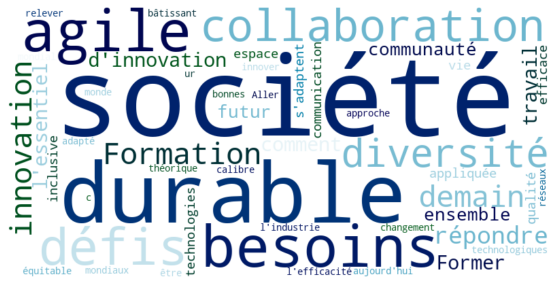

In [15]:
# Import necessary packages
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
#from nltk.stem import SnowballStemmer  # Import the stemmer

# Load the data from the text file into a DataFrame with the correct encoding
data = pd.read_csv('data.csv', encoding="ISO-8859-1")  # Adjust the encoding if needed

# Specify the column you want to create the word cloud from
column_name = 'text'  # Replace 'your_column_name' with the actual column name

# Combine the text from the selected column into a single string
text = ' '.join(data[column_name].astype(str))

#creating a proper string (convertion from unicode to str) required for the wordcloud method
common_french_stopwords = set(stopwords.words('french'))
# Manually extend the list of common stop words
additional_stopwords = {
    "Étre", "Aller", "vers", "comprenant"}

# Update the set of stop words with the additional stop words
common_french_stopwords.update(additional_stopwords)
  
# Create a Snowball Stemmer for French
#stemmer = SnowballStemmer("french")
    
# Tokenize the text
words = nltk.word_tokenize(text)

# Remove common French stop words
filtered_words = [word for word in words if word.lower() not in common_french_stopwords]

# Join the filtered words back into a single string
filtered_text = ' '.join(filtered_words)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=50,colormap='ocean').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('analyse1.png')

**Analyse 2**

use the votes as additional weight to boost certain words


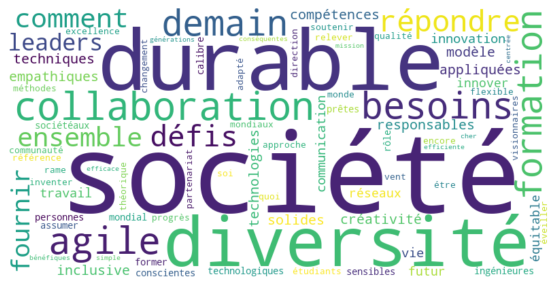

In [7]:
#import pandas as pd
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt
#import nltk
from collections import defaultdict
from nltk.corpus import stopwords
#
# Load your data into a DataFrame
# Replace 'data.csv' with your actual data file
data = pd.read_csv('data.csv', encoding="ISO-8859-1")

# Specify the column names
text_column = 'text'  # Replace with the actual column name containing short text
vote_column = 'Votes'  # Replace with the actual column name containing audience votes

# Tokenize and preprocess the text
additional_stopwords = {
    "être", "bâtissant", "ans", "dos"}
common_french_stopwords.update(additional_stopwords)


stop_words = common_french_stopwords  # You can change to the appropriate language
word_frequency = defaultdict(float)  # To store the combined weighted word frequency

# Calculate the total vote count
total_vote_count = data[vote_column].sum()

for index, row in data.iterrows():
    text = row[text_column]
    vote = row[vote_column]
    
    # Ensure that text is a string or convert it to one
    if isinstance(text, str):
        # Tokenize and remove stopwords
        words = nltk.word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        
        # Calculate the weighted score for each word
        word_weight = vote / total_vote_count if total_vote_count > 0 else 0.0  # Normalize by total vote count
        
        # Update word frequency with the weighted score
        for word in words:
            word_frequency[word] += word_weight

# Create a WordCloud with weighted frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=80).generate_from_frequencies(word_frequency)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


redo the colormap in polymtl colors: 
(in this setup the colors are still randomly assigned to words, it is possible to assign colors to a certain threshold. 


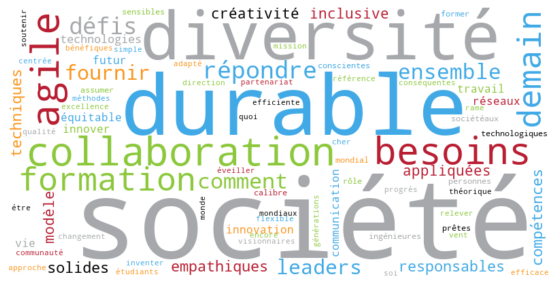

In [11]:
import matplotlib.colors as mcolors

# Define the custom colors in RGB format
custom_colors = {
    'black': (0, 0, 0),
    'gray': (166, 168, 171),
    'blue': (65, 170, 230),
    'green': (140, 200, 60),
    'orange': (250, 150, 30),
    'red': (185, 30, 50)
}

# Normalize the RGB values to the range [0, 1]
normalized_colors = {name: tuple(x / 255 for x in rgb) for name, rgb in custom_colors.items()}

# Create a colormap
PolyRGB = mcolors.ListedColormap(list(normalized_colors.values()))


wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=80, colormap=PolyRGB.reversed()).generate_from_frequencies(word_frequency)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

To determine which team best captured the spirit of all people participating based on the highest rated words in their text column, you can calculate a team's overall "spirit score" by summing the normalized vote values for the words in their text. The team with the highest total spirit score would be considered to have captured the spirit the best. 

In [16]:
team_column = 'team_column'  # Replace with the actual column name containing team names


# Create a dictionary to store the team spirit scores
team_spirit_scores = {}

# Calculate the total vote count
total_vote_count = data['Votes'].sum()

for index, row in data.iterrows():
    text = row['text']
    vote = row['Votes']
    team = row['team']
    
    # Ensure that text is a string or convert it to one
    if isinstance(text, str):
        # Tokenize and remove stopwords
        words = nltk.word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        
        # Calculate the weighted score for each word
        word_weight = vote / total_vote_count if total_vote_count > 0 else 0.0  # Normalize by total vote count
        
        # Update team spirit score based on word weights
        if team not in team_spirit_scores:
            team_spirit_scores[team] = 0.0
        team_spirit_scores[team] += sum([word_weight for _ in words])

# Determine the team with the highest overall spirit score
best_team = max(team_spirit_scores, key=team_spirit_scores.get)

print(f"The team that captured the spirit the best is: {best_team}")
print(f"Spirit Score: {team_spirit_scores[best_team]}")

The team that captured the spirit the best is: Les ananaouni
Spirit Score: 0.8307291666666667


To determine which category scored the overall most points and to which category the highest-scoring words are linked, you can calculate the total points for each category and analyze the word weights within each category. 

In [23]:
category_column = 'cat'  # Replace with the actual column name containing categories


# Create dictionaries to store the total points for each category and word weights within each category
category_total_points = defaultdict(float)
category_word_weights = defaultdict(float)

# Calculate the total vote count
total_vote_count = data[vote_column].sum()

for index, row in data.iterrows():
    text = row[text_column]
    vote = row[vote_column]
    category = row[category_column]
    
    # Ensure that text is a string or convert it to one
    if isinstance(text, str):
        # Tokenize and remove stopwords
        words = nltk.word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        
        # Calculate the weighted score for each word
        word_weight = vote / total_vote_count if total_vote_count > 0 else 0.0  # Normalize by total vote count
        
        # Update the total points for the category
        category_total_points[category] += word_weight
        
        # Update word weights within the category
        category_word_weights[category] += sum([word_weight for _ in words])

# Determine the category with the overall most points
best_category = max(category_total_points, key=category_total_points.get)

# Determine the category with the highest-scoring words
best_word_category = max(category_word_weights, key=category_word_weights.get)

print(f"The category with the overall most points is: {best_category}")
print(f"Total Points: {category_total_points[best_category]}")

print(f"The category with the highest-scoring words is: {best_word_category}")
print(f"Word Weight within Category: {category_word_weights[best_word_category]}")
print('\n\n\n')

# Create a ranking of categories based on total points
category_ranking = sorted(category_total_points.items(), key=lambda x: x[1], reverse=True)

# Print the category ranking
print("Category Ranking (Category, Total Points):")
for rank, (category, total_points) in enumerate(category_ranking, start=1):
    print(f"{rank}. {category}: {total_points}")
    
    
print('\n\n\n')


The category with the overall most points is: Vision - formation
Total Points: 0.2786458333333333
The category with the highest-scoring words is: Vision - formation
Word Weight within Category: 1.7473958333333333




Category Ranking (Category, Total Points):
1. Vision - formation: 0.2786458333333333
2. Mission: 0.24609375
3. Vision - communauté: 0.24088541666666669
4. Vision - recherche: 0.23437500000000003




